In [1]:
# GE 461 Project 4 Fall Detection Fahad Waseem Butt 21801356

# Upload the dataset file from the device's local drive.
# Upload when prompted, from below this code block.

# Uploading dataset
from google.colab import files
uploaded = files.upload()

Saving falldetection_dataset.csv to falldetection_dataset (1).csv


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [3]:
dataset = pd.read_csv('falldetection_dataset.csv', header=None)
data = dataset.iloc[:, 1:]              # Removing first column (Left over columns i.e. 1 ~ 566)
# print(data)
data_labels = data.iloc[:, 0].values    # Separating labels i.e F or NF (First Column) (566,)
# print(data_labels)
data_features = data.iloc[:, 1:].values # Separating numeric data (566, 306)
# print(data_features)

scaled_features = StandardScaler().fit_transform(data_features)   # Scaling the numeric input data
# print(scaled_features)

# Check whether normalized data has mean=0 & SD=1
Mean = np.mean(scaled_features)
StdDev = np.std(scaled_features)
print('Mean =', Mean , ', Standard Deviation =', StdDev)

Mean = 2.0204987260782545e-18 , Standard Deviation = 1.0


In [4]:
print(dataset.shape)
print(data.shape)
print(data_features.shape)
print(data_labels.shape)
print(scaled_features.shape)

(566, 308)
(566, 307)
(566, 306)
(566,)
(566, 306)


PART A

In [5]:
# Projecting the 306 dimensional fall detection data to ten-dimensional principal components
pca_fall = PCA(n_components=8)
pca_fall.fit_transform(scaled_features)
# Variance each principal component holds
print('Variance per PC: {}'.format(pca_fall.explained_variance_ratio_))
pca_toptwo = PCA(n_components=2)
pca_toptwo.fit_transform(scaled_features)
print('\nVariance for top 2 PCs: {}'.format(pca_toptwo.explained_variance_ratio_))

Variance per PC: [0.23101268 0.1762439  0.08825718 0.07546181 0.05088666 0.03660506
 0.03196652 0.02644051]

Variance for top 2 PCs: [0.23101268 0.1762439 ]


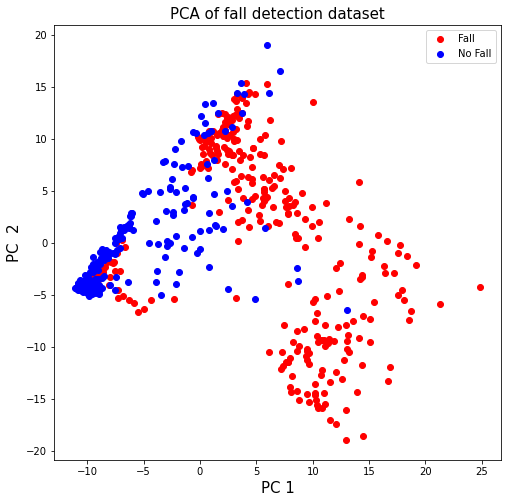

In [6]:
# Projecting 306 dimensional fall detection data to two-dimensional principal components
pca_fall = PCA(n_components=2)
scaled_updated = pca_fall.fit_transform(scaled_features) # Apply scaling by doing fit_transform
plt.figure(figsize=(8,8))
plt.scatter(scaled_updated[data_labels == 'F',0], scaled_updated[data_labels == 'F',1],c='r', label='Fall')
plt.scatter(scaled_updated[data_labels == 'NF',0], scaled_updated[data_labels == 'NF',1],c='b', label='No Fall')
plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.xlabel('PC 1',fontsize=15),plt.ylabel('PC  2',fontsize=15)
plt.title("PCA of fall detection dataset",fontsize=15);
plt.legend();

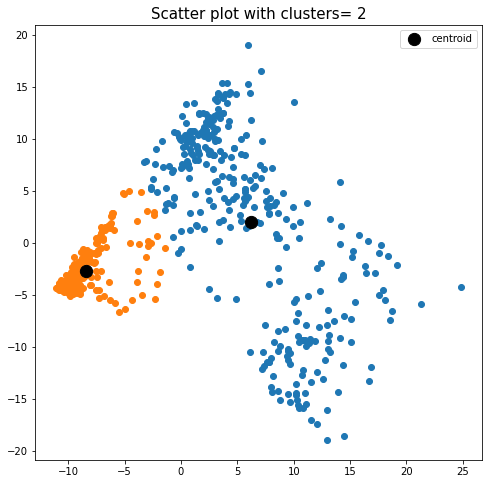

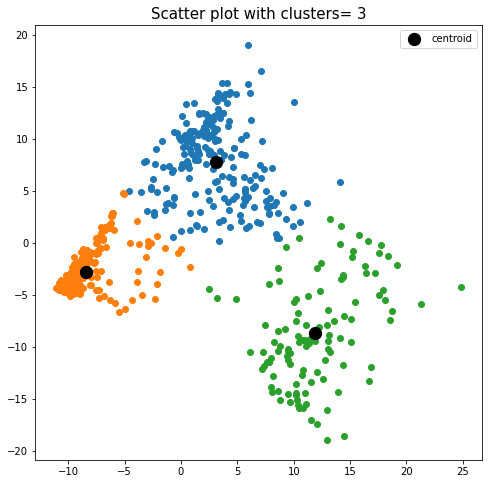

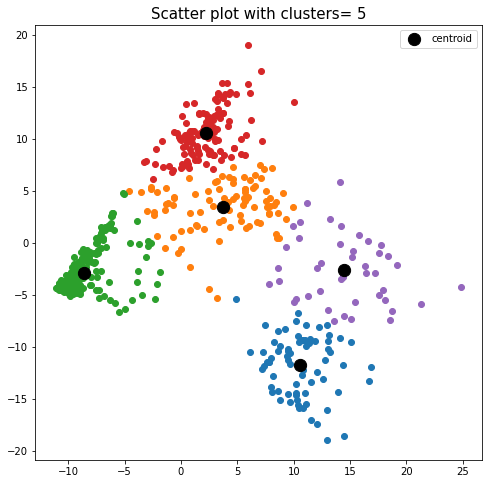

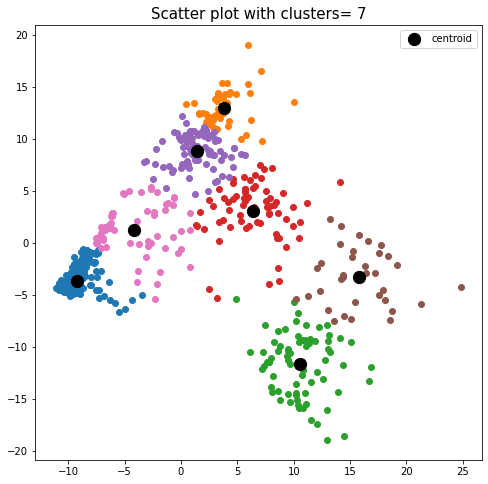

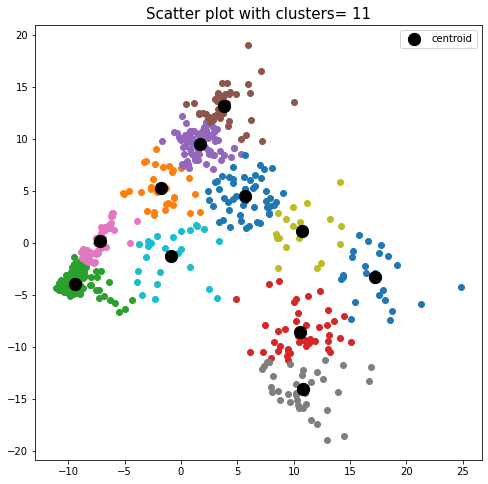

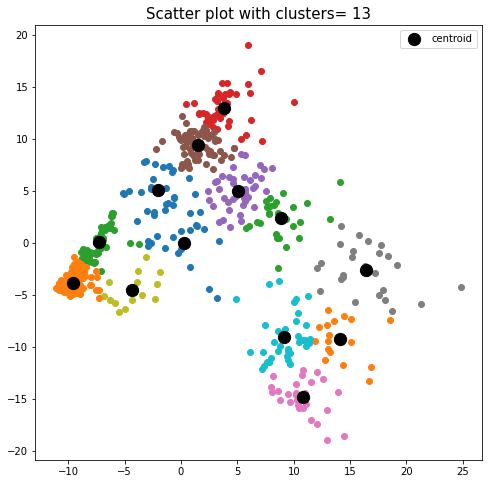

In [7]:
# K-means Clustering
cluster_range = [2, 3, 5, 7, 11, 13]
inertias = []
for cr in cluster_range:
    km = KMeans(n_clusters=cr,random_state=0,max_iter=50).fit(scaled_updated)
    inertias.append(km.inertia_)
    plt.figure(figsize=(8,8))
    plt.title('Scatter plot with clusters= ' + str(cr), fontsize=15)
    for i in range(cr):
      plt.scatter(scaled_updated[km.labels_ == i, 0], scaled_updated[km.labels_ == i, 1])
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], label='centroid', c='black',marker='o', s=150)
    plt.legend();

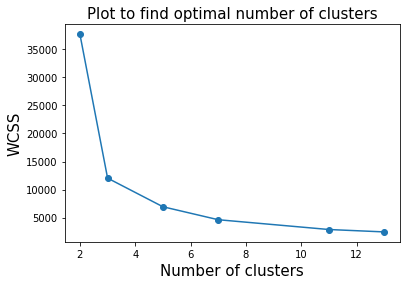

In [8]:
plt.figure()
plt.plot(cluster_range,inertias,'o-')
plt.xlabel('Number of clusters',fontsize=15),plt.ylabel('WCSS',fontsize=15)
plt.title("Plot to find optimal number of clusters",fontsize=15);

Percentage overlap/consistency with action labels originally provided for both F and NF cases = 18.727915194346288




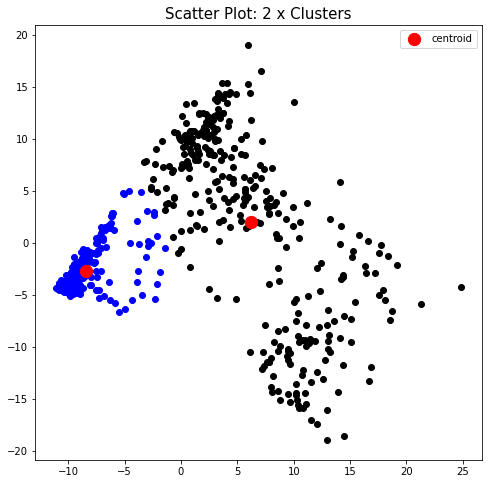

In [90]:
# Percentage overlap/consistency for 2 x clusters
km = KMeans(n_clusters=2, max_iter=150, random_state=0).fit(scaled_updated)
plt.figure(figsize=(8,8))
plt.title('Scatter Plot: 2 x Clusters',fontsize=15)
plt.scatter(scaled_updated[km.labels_ == 0, 0], scaled_updated[km.labels_ == 0, 1],c='black')
plt.scatter(scaled_updated[km.labels_ == 1, 0], scaled_updated[km.labels_ == 1, 1],c='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='o',s=150,c='red', label='centroid'),plt.legend()
# Find index where one is located
index_ones=[i for i, e in enumerate(km.labels_) if e == 1]
# Check if F is also present at the found index
OL_NF=[i for i, e in enumerate(data_labels[index_ones]) if e == 'F']
NF_overlap=len(OL_NF)
# Find index where zero is located
index_zeroes=[i for i, e in enumerate(km.labels_) if e == 0]
# Check if NF is also present at the found index
OL_F=[i for i, e in enumerate(data_labels[index_zeroes]) if e == 'NF']
F_overlap=len(OL_F)
print('Percentage overlap/consistency with action labels originally provided for both F and NF cases =', ((NF_overlap+F_overlap)/data_labels.shape[0]*100))
print('\n')

PART B

In [11]:
# Split to get Test data = 15 %, Train data= 85 %   # Using reduced dimensional data
X_train, X_test, y_train, y_test = train_test_split(scaled_updated, data_labels,test_size=0.15, shuffle = True, random_state = 8)

# Split to get Train date = 70 % (1-0.1765)*0.85, val data = 15% (0.1765*0.85)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state= 8)

In [66]:
clf = svm.SVC(kernel='rbf', gamma=0.2, max_iter = 1000, tol = 1e-05)
SVMclassifier = clf.fit(X_train,y_train)
#Predict the response for Test dataset
val_pred1 = SVMclassifier.predict(X_val)
#Predict the response for Validation dataset
test_pred1 = SVMclassifier.predict(X_test)
# Model Accuracy
print("Validation Accuracy:",metrics.accuracy_score(y_val, val_pred1))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_pred1))

Validation Accuracy: 0.9294117647058824
Test Accuracy: 0.8823529411764706


Iteration 1, loss = 0.84376342
Iteration 2, loss = 0.71362103
Iteration 3, loss = 0.61356523
Iteration 4, loss = 0.54323146
Iteration 5, loss = 0.49986825
Iteration 6, loss = 0.46859094
Iteration 7, loss = 0.44798057
Iteration 8, loss = 0.43391653
Iteration 9, loss = 0.42403981
Iteration 10, loss = 0.41748070
Iteration 11, loss = 0.41244938
Iteration 12, loss = 0.40820908
Iteration 13, loss = 0.40564101
Iteration 14, loss = 0.40386837
Iteration 15, loss = 0.40265793
Iteration 16, loss = 0.40200011
Iteration 17, loss = 0.39864987
Iteration 18, loss = 0.39705374
Iteration 19, loss = 0.39638809
Iteration 20, loss = 0.39515451
Iteration 21, loss = 0.39625789
Iteration 22, loss = 0.39357740
Iteration 23, loss = 0.39379426
Iteration 24, loss = 0.39275615
Iteration 25, loss = 0.39173381
Iteration 26, loss = 0.39109946
Iteration 27, loss = 0.39116570
Iteration 28, loss = 0.39065955
Iteration 29, loss = 0.38941967
Iteration 30, loss = 0.38979464
Iteration 31, loss = 0.38856864
Iteration 32, los

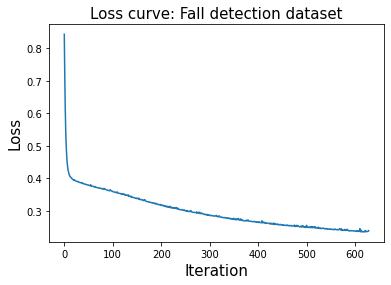

In [87]:
clf = MLPClassifier(hidden_layer_sizes=(16, 128), activation='relu', solver='adam',
                        verbose=True, max_iter=1000, early_stopping=False, random_state=0, alpha=0.01, beta_1=0.75, beta_2=0.975, epsilon=1e-4)
MLPclassifier = clf.fit(X_train, y_train)
#Predict the response for Test dataset
val_pred2 = MLPclassifier.predict(X_val)
#Predict the response for Validation dataset
test_pred2 = MLPclassifier.predict(X_test)
print("Validation Accuracy:",metrics.accuracy_score(y_val, val_pred2))
print("\nTest Accuracy:",metrics.accuracy_score(y_test, test_pred2))
print("\n")
plt.plot(clf.loss_curve_)
plt.xlabel('Iteration',fontsize=15),plt.ylabel('Loss',fontsize=15)
plt.title("Loss curve: Fall detection dataset",fontsize=15);